A. Do the exploratory data analysis and provide insights about the variables
and possible concerns such as outliers, high leverage points, and so on. 

In [2]:
import pandas as pd
# Load the 'insurance' dataset from ISLP
df = pd.read_csv('./insurance.csv')

# 1. Exploratory Data Analysis (EDA)

# Check the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The summary of dataset:

In [3]:
# Check summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there is any missing value in dataset:

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


So there is no missing value.

No we visualise the dataset, so the disturbation  of charges cell accross different ranges of values will be shown:

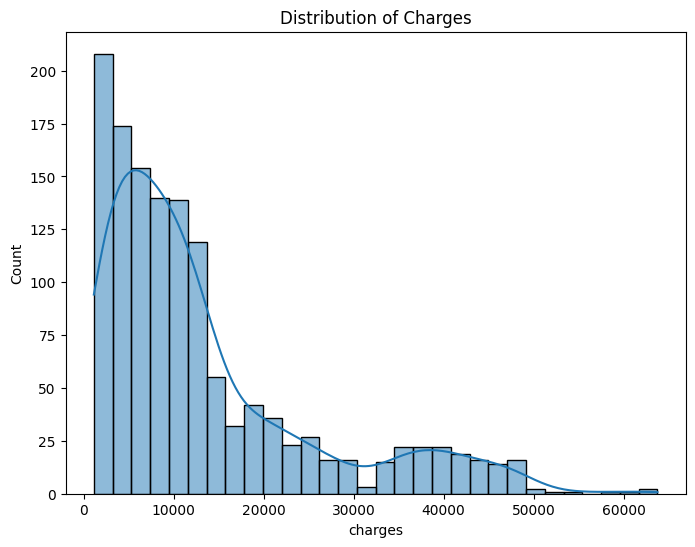

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

No we visualize the relation between each two variables

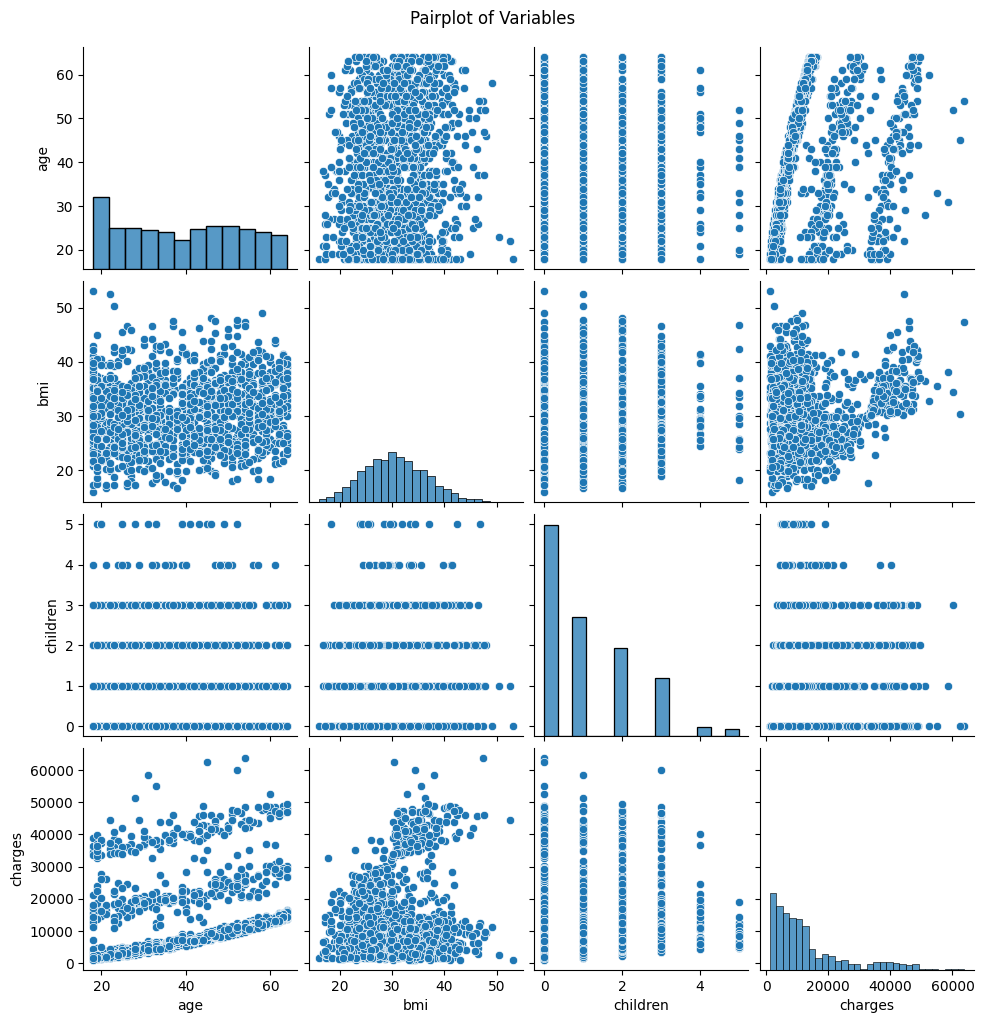

In [9]:
# Visualize the relationships between charges and other variables
sns.pairplot(df)
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

In the plot above, each of these 9 cells, indicates the relation between two variables. for example the first cell(from left) of the second row, indicates the relation between 'age' and 'bmi' variables.

** Question **

1. Is there a relationship between charges and the attributes?
2. How strong is the relationship?

   Yes the there is a linear relation between them. we show that by Designing a Multiple Linear regression model. After that by calculating The Linear Model coefficients and R-Squared we can answer these questions. (As it is answered in next sections)



In [11]:
from ISLP.models import (ModelSpec as MS, summarize, poly)
import statsmodels.api as sm

# Choose the dependent variable (response variable)
y = df['charges']
# Choose independent variables
X = MS(['age', 'sex', 'smoker', 'region', 'bmi', 'children']).fit_transform(df)
# Add categorical variables as dummy variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)
# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)
# Fit a linear regression model
model = sm.OLS(y, X.astype(float)).fit()

Now we show the details of this model we designed:

In [13]:
print("\nLinear Regression Results:\n", model.summary())


Linear Regression Results:
                             OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:03:19   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept  

Now using summarize() method, we show the parameter estimates, their standard errors, t-statistics and p-values.

In [14]:
summarize(model)

,coef,std err,t,P>|t|
intercept,-11940.0000,987.819,-12.086,0.000
age,256.8564,11.899,21.587,0.000
bmi,339.1935,28.599,11.860,0.000
children,475.5005,137.804,3.451,0.001
sex_male,-131.3144,332.945,-0.394,0.693
smoker_yes,23850.0000,413.153,57.723,0.000
region_northwest,-352.9639,476.276,-0.741,0.459
region_southeast,-1035.0220,478.692,-2.162,0.031
region_southwest,-960.0510,477.933,-2.009,0.045


** Question **

3. Which attributes are associated with charges?44. How strong is the association between each attribute and charges

    To identify which attributes are associated with charges, we can examine the coefficients of the linear regression model. The coefficients represent the estimated effect of each independent variable on the dependent variable (charges)?

In [15]:
print(model.params)

intercept          -11938.538576
age                   256.856353
bmi                   339.193454
children              475.500545
sex_male             -131.314359
smoker_yes          23848.534542
region_northwest     -352.963899
region_southeast    -1035.022049
region_southwest     -960.050991
dtype: float64


For example, 'age' has a coefficient of 256.856353. it suggests that, on average, charges increase by $256.856353 for each one-year increase in age, assuming other variables are constant.

** Question **

5. How accurately can we predict future charges?

    To assess how accurately this model can predict future charges, we can calculate at the R-squared value from the linear regression model. The R-squared value measures the proportion of the variance in the dependent variable (charges) that is explained by the independent variables in the model.
   The tesult is a floating point number between 0 and 1; If R-squared is close to 1, it suggests that a large proportion of the variability in charges is explained by the model, indicating high accuracy in future predictions.


In [16]:
print(f"\nR-squared: {model.rsquared}")


R-squared: 0.7509130345985207


The value indicates the model has a good accuracy (not perfect) as it fits 75% of the original data.

** Question **

6. Is the relationship linear?

    To assess whether the relationship between the independent variables and charges is linear, we can examine the residual plot. In a linear regression model, the residuals (the differences between the observed and predicted values) should exhibit a random pattern around zero. If the residuals show a systematic pattern, it may indicate a non-linear relationship.

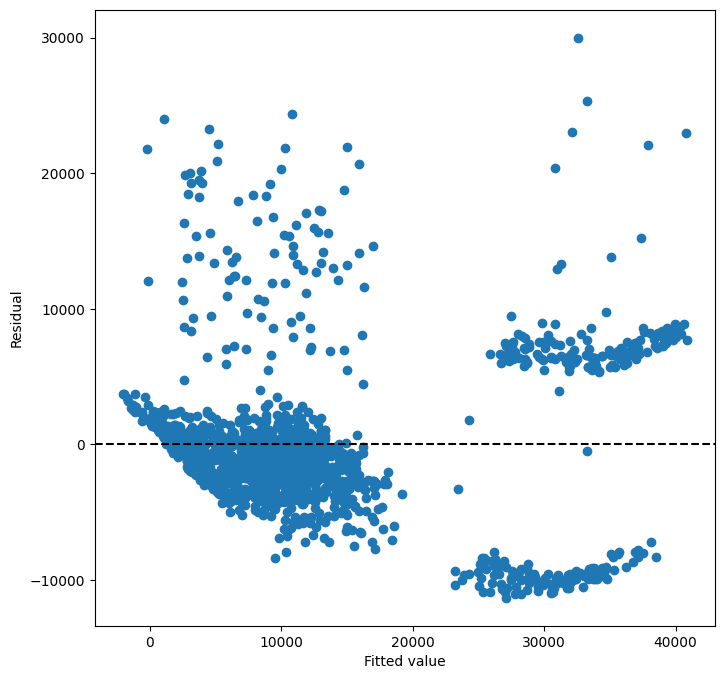

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.axhline(0, c='k', ls='--')
plt.show()

As it is shown in the plot, The residuals are approximately near zero, indicating that the linear regression we designed fits the dataset and the relationship is actualy linear.

** Question **

7. Is there synergy among the attributes?

   To check for synergy among the attributes (interaction effects), you can examine the Variance Inflation Factor (VIF) for each independent variable in the linear regression model. The VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated.

In [18]:
# Display VIF (Variance Inflation Factor) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vals = [VIF(X.astype(float), i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
print("\nVIF:")
print(vif)


VIF:
                       vif
age               1.016822
bmi               1.106630
children          1.004011
sex_male          1.008900
smoker_yes        1.012074
region_northwest  1.518823
region_southeast  1.652230
region_southwest  1.529411


If the VIF for a variable is close to 1, it indicates that the variable is not highly correlated with other variables, and there is no significant multicollinearity. However, if the VIF is significantly greater than 1 (e.g., above 5 or 10), it suggests a high degree of correlation with other variables, indicating potential synergy or multicollinearity.

As the results indicate, neigher of variables are correlated to another and there is no synergy among the attributes.